# Million Song Dataset Exploratory Data Analysis  

## Setup

In [1]:
import os
import boto3
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import json
base_dir = os.path.join('/home', 'ubuntu', 'data', 'millionsongdataset_echonest')

# Read data from S3

In [2]:
# SET-UP STANDARD METHOD 
if sys.version_info[0] < 3: 
    from StringIO import StringIO # Python 2.x
else:
    from io import StringIO # Python 3.x

# get your credentials from environment variables
aws_id = 'X'
aws_secret = 'Y'

bucket_name = 'sagemaker-msdsubset'

client = boto3.client('s3', aws_access_key_id=aws_id,
        aws_secret_access_key=aws_secret)

In [4]:
# Get the table
object_key = 'subset_flat_fmtags_2.csv'
csv_obj = client.get_object(Bucket=bucket_name, Key=object_key)

body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df = pd.read_csv(StringIO(csv_string))

In [5]:
# Check out the data
print(df.shape)
df.head()

(1941, 38)


,Unnamed: 0,song_id,spotifyid,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_mbid,artist_mbtags,...,tempo,title,track_7digitalid,track_id,year,last_fm_tags,last_fm_tag_count,similar_songs,similar_songs_distance,last_fm_tags_s
0,1,SOUSXAY12A8C1358FA,spotify:track:1WKwpLZYJjJKMnVAJ092xy,22050,21239,0.833179,0.804220,AR6PJ8R1187FB5AD70,b'bf24ca37-25f4-4e34-9aec-460b94364cfc',"[""colombian"", ""classic pop and rock"", ""espa\u0...",...,93.982,b'Poem To A Horse',5844048,TRANQLL128F92F5263,2001,"['Shakira', 'pop', 'rock', 'latin', 'female vo...","['100', '96', '62', '62', '62', '49', '40', '2...","['TRUTJDG128F92F5262', 'TRULZUZ128F427D869', '...","[1, 1, 0.990385, 0.0436624, 0.0364442, 0.0364442]",NaN
1,3,SOSHODS12A6D4F79BC,spotify:track:5lPNxe0apRPLZDTcHKoNGO,22050,1480,0.790368,0.642656,ARIPLUN1187B99B9F9,b'9e0e2b01-41db-4008-bd8b-988977d6019a',"[""british"", ""uk"", ""rock"", ""new wave"", ""english...",...,123.657,"b""When The World Is Running Down_ You Make The...",385776,TRABMFI128F1476F9F,0,"['rock', '80s', 'new wave', 'classic rock', 'p...","['100', '92', '76', '46', '38', '23', '15', '1...","['TRIVXKZ128E0793AD7', 'TRMJOED128F147727C', '...","[1, 0.928207, 0.928207, 0.138333, 0.131182, 0....",NaN
2,5,SOSHUVD12A6701F8F9,spotify:track:4IGUhtEPrvDVQfpHp9QFPj,22050,202912,0.865022,0.916053,ARJ7KF01187B98D717,b'cc197bad-dc9c-440d-a5b5-d52ba2e14234',"[""british"", ""uk"", ""alternative rock"", ""piano p...",...,122.940,b'Speed Of Sound (Live)',117664,TRASUJK128E0789C12,2005,"['britpop', 'Coldplay', 'rock', 'alternative r...","['100', '80', '60', '50', '40', '40', '30', '3...",[],[],NaN
3,6,SOCDLUF12A8C13F13F,spotify:track:6LYSxEzf57qmM5Ioi0yR4m,22050,983,0.741518,0.520412,AR1ZKBE1187FB53629,b'5700dcd4-c139-4f31-aa3e-6382b9af9032',"[""german"", ""electronic"", ""synthpop"", ""krautroc...",...,140.042,b'Tour De France \xc3\x89tape 3 (2009 Digital ...,6764800,TRBHSWH12903D07A35,0,"['-d5', '---04fh', '1106fh']","['100', '100', '100']","['TRBMLJH12903D07A39', 'TRRXZPK12903D07A30', '...","[1, 0.97398, 0.0326332, 0.0312563, 0.0236442, ...",NaN
4,8,SOCDDCO12A6D4FBCF4,spotify:track:553qVtIDYjt7RNrLKS2m4S,22050,157532,0.646402,0.423300,ARJ438T1187B9AD503,b'3d6bbeb7-f90e-4d10-b440-e153c0d10b53',[],...,150.050,b'Pathfinders',2501487,TRATGQO128F421B850,2004,"['folk metal', 'Power metal', 'metal', 'Awesom...","['100', '87', '25', '12', '12', '12', '12', '1...","['TRZQKIF128F421B856', 'TRIMCAH128F421B867', '...","[1, 0.971999, 0.083039, 0.0818145, 0.0730594, ...",NaN


In [6]:
df_slim = df[['song_id', 'last_fm_tags', 'last_fm_tag_count']]
print(df_slim.shape)
df_slim.head(15)

(1941, 3)


,song_id,last_fm_tags,last_fm_tag_count
0,SOUSXAY12A8C1358FA,"['Shakira', 'pop', 'rock', 'latin', 'female vo...","['100', '96', '62', '62', '62', '49', '40', '2..."
1,SOSHODS12A6D4F79BC,"['rock', '80s', 'new wave', 'classic rock', 'p...","['100', '92', '76', '46', '38', '23', '15', '1..."
2,SOSHUVD12A6701F8F9,"['britpop', 'Coldplay', 'rock', 'alternative r...","['100', '80', '60', '50', '40', '40', '30', '3..."
3,SOCDLUF12A8C13F13F,"['-d5', '---04fh', '1106fh']","['100', '100', '100']"
4,SOCDDCO12A6D4FBCF4,"['folk metal', 'Power metal', 'metal', 'Awesom...","['100', '87', '25', '12', '12', '12', '12', '1..."
5,SOCDAIR12A8C131F89,['relaxing'],['100']
6,SOHASMZ12A8AE48671,"['pop', 'female vocalists', 'angry', 'work', '...","['100', '66', '41', '41', '33', '25', '16', '1..."
7,SOHANQX12A8C13C2C4,"['elvis', 'Garage Rock', 'psychobilly', '70s',...","['100', '33', '33', '33', '33']"
8,SOHAVVY12A8C1422E6,"['experimental', 'rock', 'latin', 'pop', 'sing...","['100', '50', '50', '50', '50', '50', '50', '5..."
9,SOHADGT12A8C13C740,"['Hip-Hop', 'lild48229']","['100', '100']"


In [7]:
# Remove NaNs
df_nonan = df_slim[~ pd.isnull(df_slim.last_fm_tags)]
df_nonan.shape

(1941, 3)

In [8]:
# Create long data of all song-tag matches
song_dict = {}
full_list = []
for row_ind in df_nonan.index: 
    row_dict = {}
    row_dict['tags'] = df_nonan['last_fm_tags'][row_ind].strip("][").replace("'","").replace('"','').split(', ')
    row_dict['tag_counts'] = tag_count_list = df_nonan['last_fm_tag_count'][row_ind].strip("][").replace("'","").split(', ')
    
    song_dict[df_nonan['song_id'][row_ind]] = row_dict
    for list_ind in range(len(row_dict['tags'])):
        full_list.append([df_nonan['song_id'][row_ind], 
                          row_dict['tags'][list_ind],
                          row_dict['tag_counts'][list_ind]])

In [9]:
# To Pandas
df_full = pd.DataFrame(full_list, columns = ["song_id", "tag", "tag_count"])

# Remove blanks
df_full['tag_count'].replace('', np.nan, inplace=True)
df_full.dropna(subset=['tag_count'], inplace=True)

# count = numeric
df_full['tag_count'] = df_full['tag_count'].astype(str).astype(int)

print(df_full.shape)
df_full.head(100)

(36070, 3)


,song_id,tag,tag_count
0,SOUSXAY12A8C1358FA,Shakira,100
1,SOUSXAY12A8C1358FA,pop,96
2,SOUSXAY12A8C1358FA,rock,62
3,SOUSXAY12A8C1358FA,latin,62
4,SOUSXAY12A8C1358FA,female vocalists,62
...,...,...,...
95,SOUSXAY12A8C1358FA,All-time favourites,1
96,SOUSXAY12A8C1358FA,live,1
97,SOUSXAY12A8C1358FA,favourite artists,1
98,SOUSXAY12A8C1358FA,Ayumi,1


In [10]:
# Basic Counts
print("Songs with no tags: " + str(len(df_slim) - df_full.song_id.nunique()))
print("Unique songs: " + str(df_full.song_id.nunique()))
print("Unique tags: " + str(df_full.tag.nunique()))
print("Total tags: " + str(df_full.tag_count.sum()))

Songs with no tags: 0
Unique songs: 1941
Unique tags: 16113
Total tags: 783931


In [11]:
# Group Bys
n_tag_bysong = df_full.groupby('song_id').tag.nunique().sort_values(ascending=False).reset_index(name='tag_count')
print(n_tag_bysong.shape)
n_song_bytag = df_full.groupby('tag').song_id.nunique().sort_values(ascending=False).reset_index(name='song_count')
print(n_song_bytag.shape)

(1941, 2)
(16113, 2)


### Tags by Song

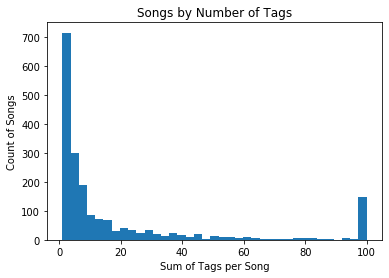

In [12]:
x = plt.hist(n_tag_bysong.tag_count, bins='auto')
plt.title("Songs by Number of Tags")
plt.ylabel('Count of Songs')
plt.xlabel('Sum of Tags per Song')
plt.show()

In [13]:
n_tag_bysong.head(10)

,song_id,tag_count
0,SOMRYSL12AB01852A8,100
1,SOPRMDL12A8C13CAF6,100
2,SOAGYNF12AB0187EEE,100
3,SOJORVL12A8C143582,100
4,SOBBUGU12A8C13E95D,100
5,SOPXTAX12A6D4F573B,100
6,SOIQFYV12A8C13EEB6,100
7,SOQAJMX12A8C131F1D,100
8,SOBBHAH12A6310FF6B,100
9,SOLEFXD12AC3DFA062,100


### Songs by Tag

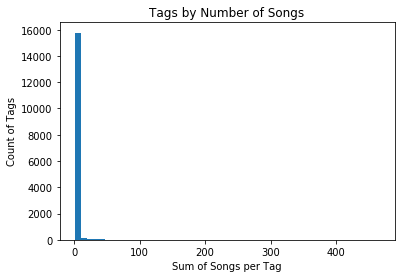

In [14]:
y = plt.hist(n_song_bytag.song_count, bins=50)
plt.title("Tags by Number of Songs")
plt.ylabel('Count of Tags')
plt.xlabel('Sum of Songs per Tag')
plt.show()

In [15]:
n_song_bytag.head(10)

,tag,song_count
0,rock,466
1,pop,282
2,alternative,249
3,indie,201
4,alternative rock,184
5,favorites,175
6,Love,160
7,00s,155
8,female vocalists,150
9,beautiful,141


In [16]:
n_song_bytag_g1 = n_song_bytag[n_song_bytag['song_count'] > 1]
print("Unique tags: " + str(df_full.tag.nunique()))
print("Unique tags (used more than 1x): " + str(len(n_song_bytag_g1)))

Unique tags: 16113
Unique tags (used more than 1x): 3806


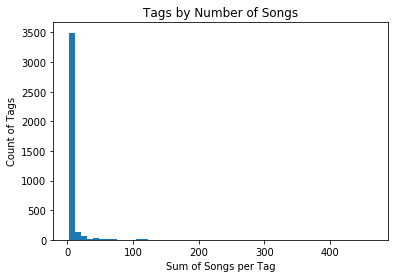

In [17]:
z = plt.hist(n_song_bytag_g1.song_count, bins=50)
plt.title("Tags by Number of Songs")
plt.ylabel('Count of Tags')
plt.xlabel('Sum of Songs per Tag')
plt.show()

In [18]:
n_tag_bysongsong = n_song_bytag.groupby('song_count').agg(['count'])
n_tag_bysongsong.shape

(102, 1)

In [19]:
print(df_full.shape)
df_full.head()

(36070, 3)


,song_id,tag,tag_count
0,SOUSXAY12A8C1358FA,Shakira,100
1,SOUSXAY12A8C1358FA,pop,96
2,SOUSXAY12A8C1358FA,rock,62
3,SOUSXAY12A8C1358FA,latin,62
4,SOUSXAY12A8C1358FA,female vocalists,62


In [20]:
### TO DO some sort of network connectivity measure? ###

# ONE HOT
# df_onehot = pd.get_dummies(df_full['tag'], prefix=['tag'])
# print(df_onehot.shape)
# df_onehot.head()

n_songs_unique = df_full.song_id.nunique()
n_tags_unique = df_full.tag.nunique()

print("Unique songs: " + str(n_songs_unique))
print("Unique tags: " + str(n_tags_unique))
print("Total possible combos: " + str(n_songs_unique * n_tags_unique))
print("Total combos observed: " + str(len(df_full)))
print("% coverage: " + str(len(df_full) / (n_songs_unique * n_tags_unique)))


Unique songs: 1941
Unique tags: 16113
Total possible combos: 31275333
Total combos observed: 36070
% coverage: 0.0011533050663281507
